## Neighborhood Feature Engineering and KMeans Clustering

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("data/trimmed_new.csv", index_col = None)

In [160]:
dfn = pd.read_csv("data/neighborhoods.csv", index_col = None)

In [161]:
#let's assume that we are only concerned with the pickup, not the dropoff 
#some blogs suggest that we drop dropoff - can discuss this later


In [162]:
#df = df.drop('Unnamed: 0', axis =1 )

In [163]:
dfc = df[['pickup_longitude', 'pickup_latitude']]

In [164]:
dfc.head()

,pickup_longitude,pickup_latitude
0,-73.982155,40.767937
1,-73.980415,40.738564
2,-74.010040,40.719971
3,-73.973053,40.793209
4,-73.982857,40.742195


In [165]:
#coords = df.to_numpy(columns=['pickup_longitude', 'pickup_latitude'])
coords = dfc.to_numpy()

#db = DBSCAN(eps=eps, min_samples=ms, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

Text(0, 0.5, 'Sum of Squares')

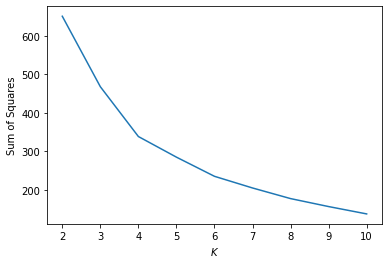

In [166]:
import sklearn.cluster
import numpy as np

# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Cast your table 'pivoted' as a matrix with as_matrix(), and store it in a variable X 
X = coords

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange = list(range(2,11))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K, random_state = 42)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(model.inertia_)
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

Text(0, 0.5, 'Count')

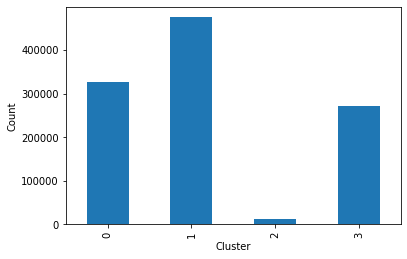

In [167]:
model = sklearn.cluster.KMeans(n_clusters=4)
df['kmeans_cluster'] = model.fit_predict(X)
df.kmeans_cluster.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')

In [168]:
#the cluster assigned is added as an additional feature in the dataset
#we are seeing that most points belong to the first two clusters.
df.head()

,Unnamed: 0,X,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_km,speed_km_sec,day,month,hour,geometry,kmeans_cluster
0,1,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.500199,0.003297,Monday,March,17,POINT (-73.98215484619141 40.767936706543),1
1,2,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.807530,0.002726,Sunday,June,0,POINT (-73.9804153442383 40.73856353759771),1
2,4,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.487163,0.003467,Wednesday,April,19,POINT (-74.0100402832031 40.719970703125),0
3,5,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189920,0.002735,Saturday,March,13,POINT (-73.9730529785156 40.7932090759277),3
4,6,5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.100174,0.002483,Saturday,January,22,POINT (-73.9828567504883 40.7421951293945),1


In [169]:
dfn.shape

(12, 3)

In [170]:
# this function calculates the coordinate distance between two points
# using it to assign neighborhoods based on smallest distance to coordinate centers.
def coordinate_distance(x1, y1, dist):
    dist = dfn.apply(lambda x: ((((x['longitude'] - x1)**2) + ((x['latitude']-y1)**2) )**0.5), axis=1)
    return dfn.iloc[np.argmin(dist)]['neighborhood']            

In [171]:
print(coordinate_distance(-73.939355, 40.841708, 10000))

Washington Heights


In [172]:
df['neighborhood'] = df.apply(lambda x: coordinate_distance(x['pickup_longitude'], x['pickup_latitude'], 10000), axis =1)

In [173]:
pwd

'/Users/Monika/Desktop/Machine_Learning/nyc_taxi'

In [174]:
#final dataset includes kmeans cluster and neighborhood columns 
df.head()

,Unnamed: 0,X,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,...,store_and_fwd_flag,trip_duration,distance_km,speed_km_sec,day,month,hour,geometry,kmeans_cluster,neighborhood
0,1,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,...,N,455,1.500199,0.003297,Monday,March,17,POINT (-73.98215484619141 40.767936706543),1,Lower Manhattan
1,2,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,...,N,663,1.807530,0.002726,Sunday,June,0,POINT (-73.9804153442383 40.73856353759771),1,Lower Manhattan
2,4,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,...,N,429,1.487163,0.003467,Wednesday,April,19,POINT (-74.0100402832031 40.719970703125),0,Lower Manhattan
3,5,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,...,N,435,1.189920,0.002735,Saturday,March,13,POINT (-73.9730529785156 40.7932090759277),3,Harlem
4,6,5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,...,N,443,1.100174,0.002483,Saturday,January,22,POINT (-73.9828567504883 40.7421951293945),1,Lower Manhattan


In [175]:
df.to_csv("data/train_4.csv")